# Heart Desease II

by Raphael Nussbaumer, Laurin Mühlebach, Lionel Nyffeler

### 1 Import

#### 1.1 Basic Libraries

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# other imports will be made when needed later in the code

#### 1.2 Importing the Dataset

In [35]:
HD = pd.read_csv('HeartDisease.csv', sep=',')

In [36]:
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [37]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [38]:
print('The shape of the Dataset is: ', HD.shape)

The shape of the Dataset is:  (297, 14)


In [39]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [40]:
#find out number of NULL Values:
HD.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [41]:
corr_matrix = HD.corr()
corr_matrix.style.background_gradient(cmap='YlOrRd')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


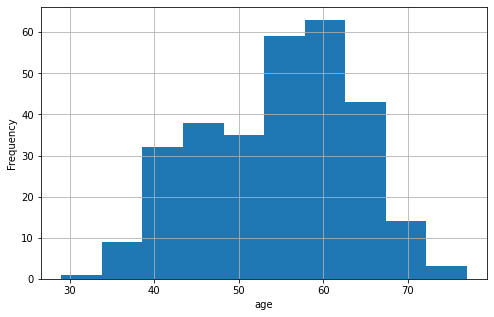

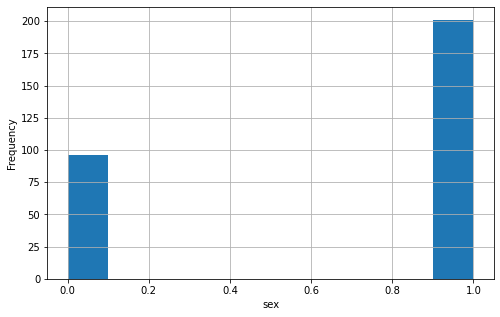

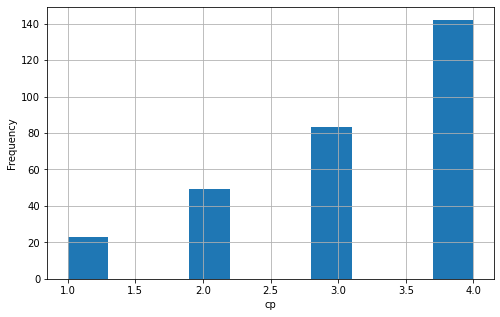

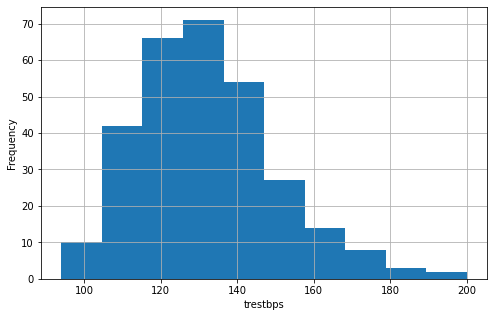

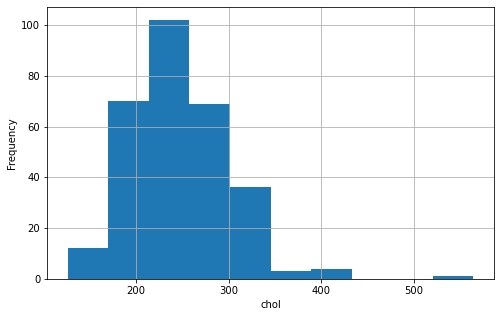

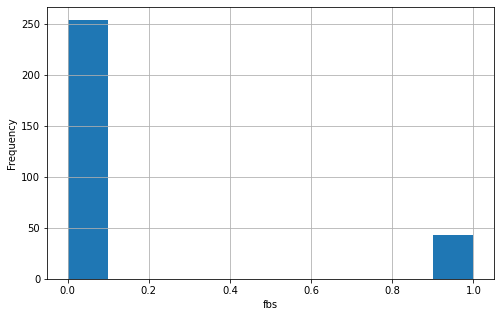

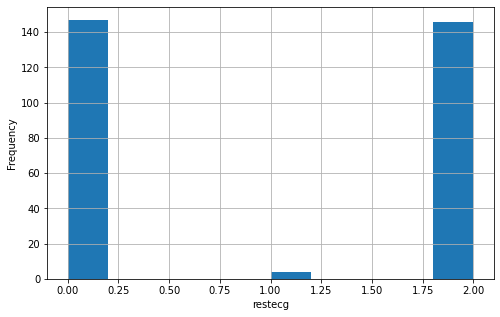

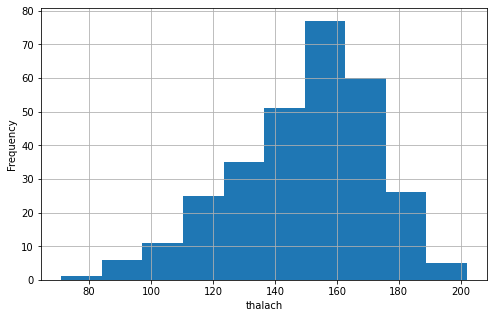

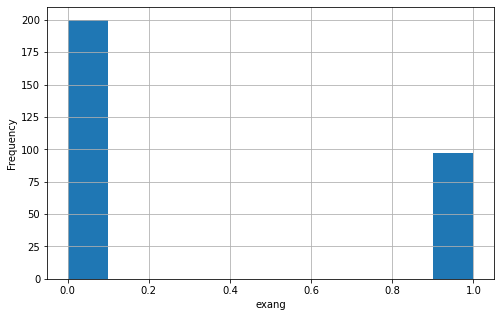

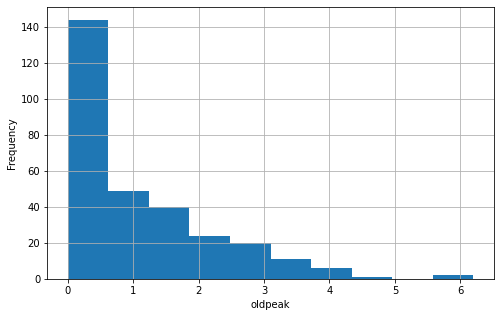

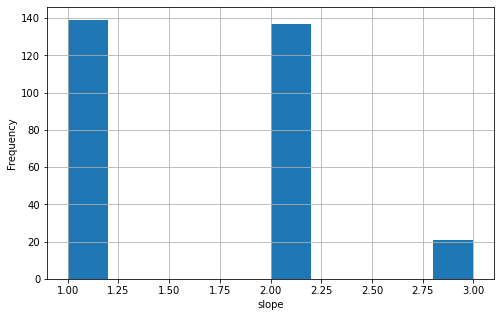

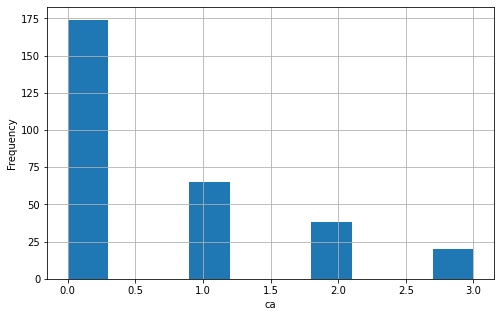

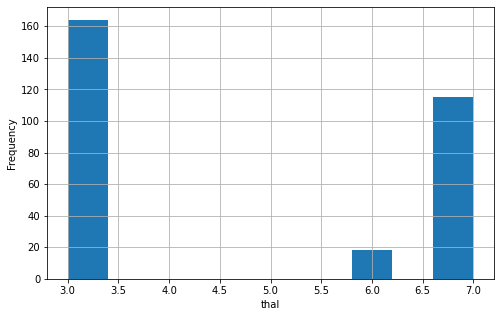

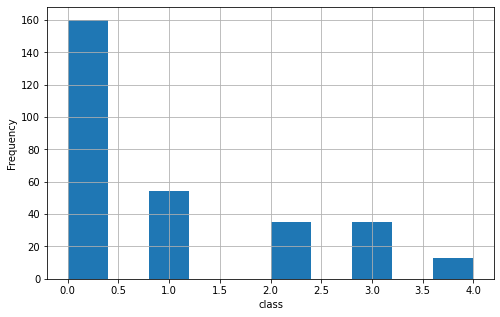

In [42]:
for i in range (0, len(HD.columns)):
    HD[HD.columns[i]].plot(kind = 'hist',
                                         grid = True,
                                         figsize = (8, 5))
    plt.xlabel(HD.columns[i])
    plt.ylabel('Frequency')
    plt.show()

### 3 Normalize the Dataset

Decision Trees can handle all handles without Normalization. Therefore no adjustments to the data has been applied.

### 4 Split the Dataset in Multiclass and Binary

Add new Column "Class Binary" which is derived from the "Class" > 0

In [43]:
HD["class binary"] = np.where(HD["class"] > 0, 1, 0)
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


#### 4.1 Multiclass

For Multiclass we drop "Class Binary" and rename "Class" to "Class Multi"

In [44]:
HD_multi = HD.drop('class binary', axis=1)
HD_multi.rename(columns={'class': 'class multi'}, inplace=True)
HD_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class multi
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### 4.2 Binary

We drop "Class", because "Class Binary" is already available

In [45]:
HD_binary = HD.drop('class', axis=1)
HD_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 5 Define X & Y

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

#### 5.1 Multi

In [46]:
x_multi = HD_multi.drop('class multi', axis=1)       # features
y_multi = HD_multi['class multi']                    # labels

In [47]:
x_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [48]:
y_multi.head()

0    0
1    2
2    1
3    0
4    0
Name: class multi, dtype: int64

#### 5.2 Binary

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

In [49]:
x_binary = HD_binary.drop('class binary', axis=1)       # features
y_binary = HD_binary['class binary']                    # labels

In [53]:
x_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [54]:
y_binary.head()

0    0
1    1
2    1
3    0
4    0
Name: class binary, dtype: int32

### 6 Analysis of the different classes

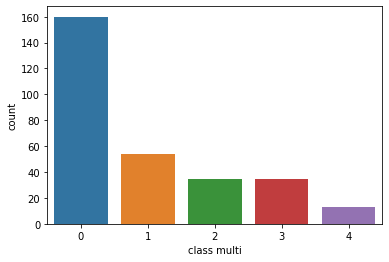

In [59]:
sns.countplot(y_multi);

In [60]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==0])/len(y_multi)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==1])/len(y_multi)*100), '%')
print('The percentage of 2 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==2])/len(y_multi)*100), '%')
print('The percentage of 3 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==3])/len(y_multi)*100), '%')
print('The percentage of 4 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==4])/len(y_multi)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 18.18 %
The percentage of 2 is: 11.78 %
The percentage of 3 is: 11.78 %
The percentage of 4 is: 4.38 %


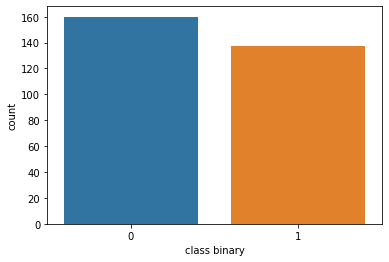

In [62]:
sns.countplot(y_binary);

In [63]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==0])/len(y_binary)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==1])/len(y_binary)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 46.13 %


### 7 Split the Dataset into Train-Validation-Test

#### 7.1 Multi

In [64]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_multi_train_val, x_multi_validation, y_multi_train_val, y_multi_validation = train_test_split(x_multi_train, y_multi_train, test_size=(0.2/0.7), random_state=42, stratify=y_multi_train)

In [65]:
#Quick check if the split is correct:
print("Shape of x_multi_train             : "+str(x_multi_train.shape))
print("Shape of x_multi_test              : "+str(x_multi_test.shape))
print("Shape of y_multi_train             : "+str(y_multi_train.shape))
print("Shape of y_multi_test              : "+str(y_multi_test.shape))
print('')
print("Lenght of Dataset                  : ", len(x_multi))
print("Percentage of Train_multi          : ", '{:.2f}'.format(len(x_multi_train)/len(x_multi)*100), '%')
print("Percentage of Test_multi           : ", '{:.2f}'.format(len(x_multi_test)/len(x_multi)*100), '%')

print("Percentage of x_multi_train_val    : ", '{:.2f}'.format(len(x_multi_train_val)/len(x_multi)*100), '%')
print("Percentage of Validation_multi     : ", '{:.2f}'.format(len(x_multi_validation)/len(x_multi)*100), '%')


Shape of x_multi_train             : (207, 13)
Shape of x_multi_test              : (90, 13)
Shape of y_multi_train             : (207,)
Shape of y_multi_test              : (90,)

Lenght of Dataset                  :  297
Percentage of Train_multi          :  69.70 %
Percentage of Test_multi           :  30.30 %
Percentage of x_multi_train_val    :  49.49 %
Percentage of Validation_multi     :  20.20 %


#### 7.2 Binary

Wichtig:
- alles korrekt mit Binary / Multi?
- Stratify nicht vergessen


In [66]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_binary_train, x_binary_test, y_binary_train, y_binary_test = train_test_split(x_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_binary_train_val, x_binary_validation, y_binary_train_val, y_binary_validation = train_test_split(x_binary_train, y_binary_train, test_size=(0.2/0.7), random_state=42)

In [67]:
#Quick check if the split is correct:
print("Shape of x_binary_train             : "+str(x_binary_train.shape))
print("Shape of x_binary_test              : "+str(x_binary_test.shape))
print("Shape of y_binary_train             : "+str(y_binary_train.shape))
print("Shape of y_binary_test              : "+str(y_binary_test.shape))
print('')
print("Lenght of Dataset                   : ", len(x_binary))
print("Percentage of Train_binary          : ", '{:.2f}'.format(len(x_binary_train)/len(x_binary)*100), '%')
print("Percentage of Test_binary           : ", '{:.2f}'.format(len(x_binary_test)/len(x_binary)*100), '%')

print("Percentage of x_binary_train_val    : ", '{:.2f}'.format(len(x_binary_train_val)/len(x_binary)*100), '%')
print("Percentage of Validation_binary     : ", '{:.2f}'.format(len(x_binary_validation)/len(x_binary)*100), '%')


Shape of x_binary_train             : (207, 13)
Shape of x_binary_test              : (90, 13)
Shape of y_binary_train             : (207,)
Shape of y_binary_test              : (90,)

Lenght of Dataset                   :  297
Percentage of Train_binary          :  69.70 %
Percentage of Test_binary           :  30.30 %
Percentage of x_binary_train_val    :  49.49 %
Percentage of Validation_binary     :  20.20 %


### 8 Implementing the Models

Overview of the applied Models:

8.1 Decision Tree mit Regression (Binär): 

        8.1.1 Basic Decision Tree -> Train & Test + Max Debth = 3
    
        8.1.2 Decision Tree mit Cross Validation (KFold: Max Debth und Hyperparameter Tuning)
8.2 Decision Tree mit Classifier (1-4 Classes):

        8.2.1 Basic Decision Tree -> Train & Test + Max Debth = 3

        8.2.2 Decision Tree mit Cross Validation (KFold: Max Debth und Hyperparameter Tuning)
8.3 Random Forest mit Regression (Binär):

8.4 Random Forest mit Classifier:

We use the following Model Abbreviations:
- dt_reg_basic
- dt_reg_cv
- dt_class_basic
- dt_class_cv
- rf_reg
- rf_class

Results:
- Model
- Max Debth
- Accurary in Sample
- Accuracy out of Sample
- Precision Score
- Recall Score
- F1 Score
- TP
- TN
- FP
- FN

In [70]:
Results = []

#### 8.1 Decision Tree with Regression (Binary)

##### 8.1.1 Decision Tree Regression Basic (dt_reg_basic)

In [71]:
# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeRegressor

# Define the tree classifier
dt_reg_basic = DecisionTreeRegressor(criterion = 'mse',max_depth=3, random_state=2)
#dt_reg_basic = DecisionTreeRegressor(criterion = 'entropy',max_depth=3, random_state=2)
# Train tree classifier on the training set
dt_reg_basic.fit(x_binary_train, y_binary_train)

DecisionTreeRegressor(max_depth=3, random_state=2)

In [ ]:
#Create classification report
dtc_multi_tuned_ypred = dtc_multi_tuned.predict(X_test_multi)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_multi, dtc_multi_tuned_ypred))

In [156]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = 'dt_reg_basic'
max_debth = 3
accuracy_in_sample = dt_reg_basic.score(x_binary_train, y_binary_train)
accurancy_out_sample = dt_reg_basic.score(x_binary_test, y_binary_test)
Precision = 1 #dt_reg_basic.precision_score(
Recall = 1
F1 = 1
TP = 1
TN = 1
FP = 1
FN = 1

In [157]:
#Append the Results from the Loop to the existing Dataframe:
dt_reg_basic_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dt_reg_basic_results = pd.DataFrame(dt_reg_basic_temp)
dt_reg_basic_results

,0,1,2,3,4,5,6,7,8,9,10
0,dt_reg_basic,3,0.591968,0.128345,1,1,1,1,1,1,1


##### 8.1.2 Decision Tree Regression with Cross Validation (dt_reg_cv)

In [119]:
# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeRegressor

# Define the tree classifier
dt_reg_cv = DecisionTreeRegressor(criterion = 'mse',max_depth=3, random_state=2)

# Train tree classifier on the training set
dt_reg_cv.fit(x_binary_train, y_binary_train)

DecisionTreeRegressor(max_depth=3, random_state=2)

In [120]:
# With cross validation
from sklearn.model_selection import cross_validate, KFold
# Define lists for the accuracies
dt_reg_cv_acc_list = []
dt_reg_cv_tpr_list = []
dt_reg_cv_acc_in_list = []
dt_reg_cv_tpr_in_list = []

In [121]:
for depth in range(1,21):
    # model
    dt_reg_cv = DecisionTreeRegressor(criterion='mse', max_depth = depth)
    # 10-Fold cross validation on whole dataset
    dt_reg_cv_results = cross_validate(dt_reg_cv, x_binary, y_binary,
                                cv = KFold(n_splits = 10, shuffle = True, random_state = 31),
                                scoring = ['accuracy', 'recall'], return_train_score = True)
    # Scores in lists
    dt_reg_cv_acc_list.append(dt_reg_cv['test_accuracy'].mean())
    dt_reg_cv_tpr_list.append(dt_reg_cv['test_recall'].mean())
    dt_reg_cv_acc_in_list.append(dt_reg_cv['train_accuracy'].mean())
    dt_reg_cv_tpr_in_list.append(dt_reg_cv['train_recall'].mean())

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [122]:
model = 'dt_reg_cv'
max_debth = 3
accuracy_in_sample = dt_reg_cv.score(x_binary_train, y_binary_train)
accurancy_out_sample = dt_reg_cv.score(x_binary_test, y_binary_test)
Precision = 1
Recall = 1
F1 = 1
TP = 1
TN = 1
FP = 1
FN = 1

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [139]:
#Append the Results from the Loop to the existing Dataframe:
dt_reg_cv_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dt_reg_cv_results = pd.DataFrame(dt_reg_cv_temp)
dt_reg_cv_results

,0,1,2,3,4,5,6,7,8,9,10
0,dt_class_cv,3,1.0,0.544444,1,1,1,1,1,1,1


#### 8.2 Decision Tree with Classifier Basic (Multi Class)

##### 8.2.1 Decision Tree Classifier Basic (dt_class_basic)

In [115]:
# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define the tree classifier
dt_class_basic = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=2)

# Train tree classifier on the training set
dt_class_basic.fit(x_multi_train, y_multi_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [116]:
model = 'dt_class_basic'
max_debth = 3
accuracy_in_sample = dt_class_basic.score(x_multi_train, y_multi_train)
accurancy_out_sample = dt_class_basic.score(x_multi_test, y_multi_test)
Precision = 1
Recall = 1
F1 = 1
TP = 1
TN = 1
FP = 1
FN = 1

In [133]:
#Append the Results from the Loop to the existing Dataframe:
dt_class_basic_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dt_class_basic_results = pd.DataFrame(dt_class_basic_temp)
dt_class_basic_results

,0,1,2,3,4,5,6,7,8,9,10
0,rf_class,3,1.0,0.544444,1,1,1,1,1,1,1


##### 8.2.2 Decision Tree Classifier Cross Validation (dt_class_cv)

In [168]:
# define score lists
# Out-of-Sample Scores
acc_liste = []
tpr_liste = []
fpr_liste = []

# Define list for in-sample Scores
acc_in_liste = []
tpr_in_liste = []
fpr_in_liste = []

In [169]:
for depth in range(1,21):
    # define model    
    dt_class_cv = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)
    # train model
    dt_class_cv.fit(x_multi_train, y_multi_train)
    # In-Sample Scores:
    # predict on train set
    y_pred_in = dt_class_cv.predict(x_multi_train)
    # accuracy
    acc_in = dt_class_cv.score(x_multi_train, y_multi_train)
    # True Positive Rate
    tpr_in = recall_score(y_multi_train, y_pred_in, average=None)  #ACHTUNG HIER AVERAGE NONE EINGEFÜGT!!!
    # False Positive Rate
    fpr_in = ((1-y_multi_train)*y_pred_in).sum()/(1-y_multi_train).sum()
    # results in list 
    acc_in_liste.append(acc_in) # With append you add each of the new values into the list, as the 
    tpr_in_liste.append(tpr_in)
    fpr_in_liste.append(fpr_in)
    
    # Out-of-Sample Scores:
    # predict on test set
    y_pred = dt_class_cv.predict(x_multi_test)
    # Acc
    acc = dt_class_cv.score(x_multi_test, y_multi_test)
    # True Positive Rate
    tpr = recall_score(y_multi_test, y_pred, average=None) #ACHTUNG HIER AVERAGE NONE EINGEFÜGT!!!
    # False Positive Rate
    fpr = ((1-y_multi_test)*y_pred).sum()/(1-y_multi_test).sum()
    # put results in list
    acc_liste.append(acc)
    tpr_liste.append(tpr)
    fpr_liste.append(fpr)

In [170]:
acc_liste

[0.5333333333333333,
 0.5444444444444444,
 0.5888888888888889,
 0.5666666666666667,
 0.4666666666666667,
 0.5,
 0.45555555555555555,
 0.4777777777777778,
 0.4444444444444444,
 0.4888888888888889,
 0.43333333333333335,
 0.4444444444444444,
 0.43333333333333335,
 0.4222222222222222,
 0.4222222222222222,
 0.4666666666666667,
 0.4222222222222222,
 0.45555555555555555,
 0.45555555555555555,
 0.4]

In [171]:
tpr_liste

[array([1., 0., 0., 0., 0.]),
 array([0.85416667, 0.        , 0.        , 0.72727273, 0.        ]),
 array([0.89583333, 0.1875    , 0.        , 0.63636364, 0.        ]),
 array([0.85416667, 0.1875    , 0.54545455, 0.09090909, 0.        ]),
 array([0.70833333, 0.3125    , 0.27272727, 0.        , 0.        ]),
 array([0.75      , 0.125     , 0.27272727, 0.36363636, 0.        ]),
 array([0.64583333, 0.1875    , 0.27272727, 0.36363636, 0.        ]),
 array([0.66666667, 0.1875    , 0.36363636, 0.36363636, 0.        ]),
 array([0.6875    , 0.25      , 0.18181818, 0.        , 0.25      ]),
 array([0.72916667, 0.375     , 0.18181818, 0.        , 0.25      ]),
 array([0.66666667, 0.25      , 0.18181818, 0.        , 0.25      ]),
 array([0.6875    , 0.1875    , 0.18181818, 0.09090909, 0.25      ]),
 array([0.625     , 0.3125    , 0.18181818, 0.        , 0.5       ]),
 array([0.64583333, 0.1875    , 0.27272727, 0.        , 0.25      ]),
 array([0.64583333, 0.1875    , 0.18181818, 0.        , 0.5 

In [ ]:
fpr_liste

In [166]:
# With cross validation
from sklearn.model_selection import cross_validate, KFold
# Define lists for the accuracies
dt_class_cv_acc_list = []
dt_class_cv_tpr_list = []
dt_class_cv_acc_in_list = []
dt_class_cv_tpr_in_list = []

In [167]:
for depth in range(1,21):
    # model
    dt_class_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    # 10-Fold cross validation on whole dataset
    dt_class_cv_results = cross_validate(dt_class_cv, x_multi, y_multi,
                                cv = KFold(n_splits = 10, shuffle = True, random_state = 31),
                                scoring = ['accuracy', 'recall'], return_train_score = True)
    # Scores in lists
    dt_class_cv_acc_list.append(dt_class_cv_results['test_accuracy'].mean())
    dt_class_cv_tpr_list.append(dt_class_cv_results['test_recall'].mean())
    dt_class_cv_acc_in_list.append(dt_class_cv_results['train_accuracy'].mean())
    dt_class_cv_tpr_in_list.append(dt_class_cv_results['train_recall'].mean())

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [165]:
#Hier müssen die Resultate von der Liste von oben einfügen:
model = 'dt_class_cv'
max_debth = 3
accuracy_in_sample = dt_class_cv.score(x_multi_train, y_multi_train)
accurancy_out_sample = dt_class_cv.score(x_multi_test, y_multi_test)
Precision = 1
Recall = 1
F1 = 1
TP = 1
TN = 1
FP = 1
FN = 1

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [134]:
#Append the Results from the Loop to the existing Dataframe:
dt_class_cv_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dt_class_cv_results = pd.DataFrame(dt_class_cv_temp)
dt_class_cv_results

,0,1,2,3,4,5,6,7,8,9,10
0,rf_class,3,1.0,0.544444,1,1,1,1,1,1,1


#### 8.3 Random Forest Regression (rf_reg)

In [105]:
# Import relevant packages
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=10, random_state=0)
rf_reg.fit(x_binary_train, y_binary_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [106]:
model = 'rf_reg'
max_debth = 3
accuracy_in_sample = rf_reg.score(x_binary_train, y_binary_train)
accurancy_out_sample = rf_reg.score(x_binary_test, y_binary_test)
Precision = 1
Recall = 1
F1 = 1
TP = 1
TN = 1
FP = 1
FN = 1

In [107]:
#Append the Results from the Loop to the existing Dataframe:
rf_reg_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
rf_reg_results = pd.DataFrame(rf_reg_temp)
rf_reg_results

,0,1,2,3,4,5,6,7,8,9,10
0,rf_reg,3,0.923525,0.451035,1,1,1,1,1,1,1


#### 8.4 Random Forest Classifier (rf_class)

In [162]:
# Import relevant packages
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(max_depth=10, random_state=0)
rf_class.fit(x_multi_train, y_multi_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [163]:
model = 'rf_class'
max_debth = 3
accuracy_in_sample = rf_class.score(x_multi_train, y_multi_train)
accurancy_out_sample = rf_class.score(x_multi_test, y_multi_test)
Precision = 1
Recall = 1
F1 = 1
TP = 1
TN = 1
FP = 1
FN = 1

In [164]:
#Append the Results from the Loop to the existing Dataframe:
rf_class_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
rf_class_results = pd.DataFrame(rf_class_temp)
rf_class_results

,0,1,2,3,4,5,6,7,8,9,10
0,rf_class,3,1.0,0.544444,1,1,1,1,1,1,1


### 9 All Results

In [149]:
dt_reg_basic_results
dt_reg_cv_results
dt_class_basic_results
dt_class_cv_results
rf_reg_results
rf_class_results

,0,1,2,3,4,5,6,7,8,9,10
0,rf_class,3,1.0,0.544444,1,1,1,1,1,1,1


In [151]:
Results = pd.DataFrame()
Results = Results.append(dt_reg_basic_results)
Results = Results.append(dt_reg_cv_results)
Results = Results.append(dt_class_basic_results)
Results = Results.append(dt_class_cv_results)
Results = Results.append(rf_reg_results)
Results = Results.append(rf_class_results)
Results.rename(columns= {0:'Model', 1:'max_debth', 2:'accuracy_in_sample', 3:'accurancy_out_sample', 4:'accurancy_out_sample', 5:'Precision', 6:'Recall', 7:'F1', 8:'TP', 9:'TN', 10:'FP', 11:'FN' }, inplace = True)
#Results.to_excel('Results.xlsx')
Results

,Model,max_debth,accuracy_in_sample,accurancy_out_sample,accurancy_out_sample,Precision,Recall,F1,TP,TN,FP
0,dt_class_cv,3,1.000000,0.544444,1,1,1,1,1,1,1
0,dt_class_cv,3,1.000000,0.544444,1,1,1,1,1,1,1
0,rf_class,3,1.000000,0.544444,1,1,1,1,1,1,1
0,rf_class,3,1.000000,0.544444,1,1,1,1,1,1,1
0,rf_reg,3,0.923525,0.451035,1,1,1,1,1,1,1
0,rf_class,3,1.000000,0.544444,1,1,1,1,1,1,1


### 10 Plots of best Model

In [ ]:
predicted = rf.predict(x_multi_test)
predicted_results = pd.DataFrame(predicted)

predicted_results
accuracy_score(y_multi_train, predicted_results)

from sklearn.tree import plot_tree
plot_tree(de_reg_basic, filled = True, rounded = True)

In [ ]:
# Out-of-sample 
y_pred = de_reg_basic.predict(x_multi_test)

# confusion_matrix
from sklearn.metrics import confusion_matrix

# Out-of-Sample Confusion Matrix
cm_credit = confusion_matrix(y_test, y_pred)
cm_credit

def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

plot_decision_boundary(de_reg_basic, X, y)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(de_reg_basic, x_test, y_test,cmap=plt.cm.Blues)